In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader

# For time stamps
from datetime import datetime

In [40]:
# The tech stocks we'll use for this analysis
tech_list = ['MRNA', 'PFE', 'BNTX', 'AZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)


#For loop for grabing yahoo finance data and setting as a dataframe
for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [41]:
company_list = [MRNA, PFE, BNTX, AZN]
company_name = ["MODERNA", "PFIZER", "BIONTECH", "ASTRAZENECA"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2020-11-25,53.090000,52.299999,52.340000,52.599998,11660900.0,52.599998,ASTRAZENECA
2020-11-27,52.770000,51.439999,51.580002,52.610001,14783200.0,52.610001,ASTRAZENECA
2020-11-30,53.419998,52.529999,53.299999,52.939999,14725200.0,52.939999,ASTRAZENECA
2020-12-01,53.360001,52.599998,53.060001,52.980000,13308200.0,52.980000,ASTRAZENECA
2020-12-02,53.599998,52.830002,52.889999,53.389999,4953700.0,53.389999,ASTRAZENECA
2020-12-03,52.959999,52.250000,52.869999,52.779999,7917100.0,52.779999,ASTRAZENECA
2020-12-04,54.139999,53.419998,53.549999,53.740002,4685400.0,53.740002,ASTRAZENECA
2020-12-07,54.490002,53.830002,54.380001,54.259998,6582900.0,54.259998,ASTRAZENECA
2020-12-08,55.060001,53.619999,53.669998,54.720001,6677600.0,54.720001,ASTRAZENECA


In [42]:
# Summary Stats
MRNA.describe()

,High,Low,Open,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,57.571008,53.362150,55.686846,55.605346,1.684443e+07,55.605346
std,30.820720,28.128206,29.765132,29.607074,1.831618e+07,29.607074
min,18.080000,17.680000,17.990000,17.780001,4.889000e+05,17.780001
25%,28.830001,25.195000,27.507500,27.219999,5.697225e+06,27.219999
50%,63.789999,59.064999,61.955000,61.795000,1.131725e+07,61.795000
75%,72.497499,68.624998,70.427498,70.639999,2.066455e+07,70.639999
max,178.500000,164.300003,177.660004,169.860001,1.255523e+08,169.860001


In [43]:
# General info
MRNA.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2019-12-09 to 2020-12-09
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   High          254 non-null    float64
 1   Low           254 non-null    float64
 2   Open          254 non-null    float64
 3   Close         254 non-null    float64
 4   Volume        254 non-null    int64  
 5   Adj Close     254 non-null    float64
 6   company_name  254 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.9+ KB


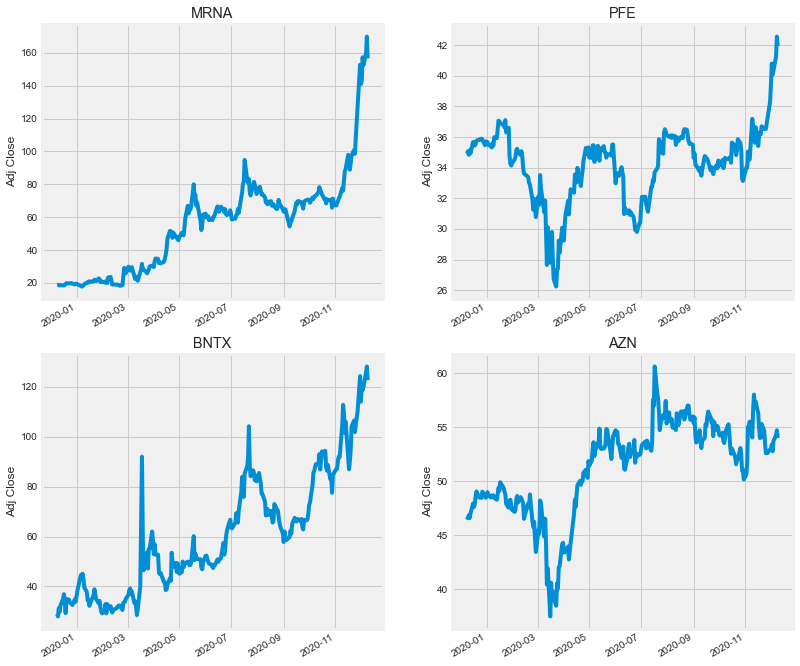

In [44]:
# Let's see a historical view of the closing price


plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

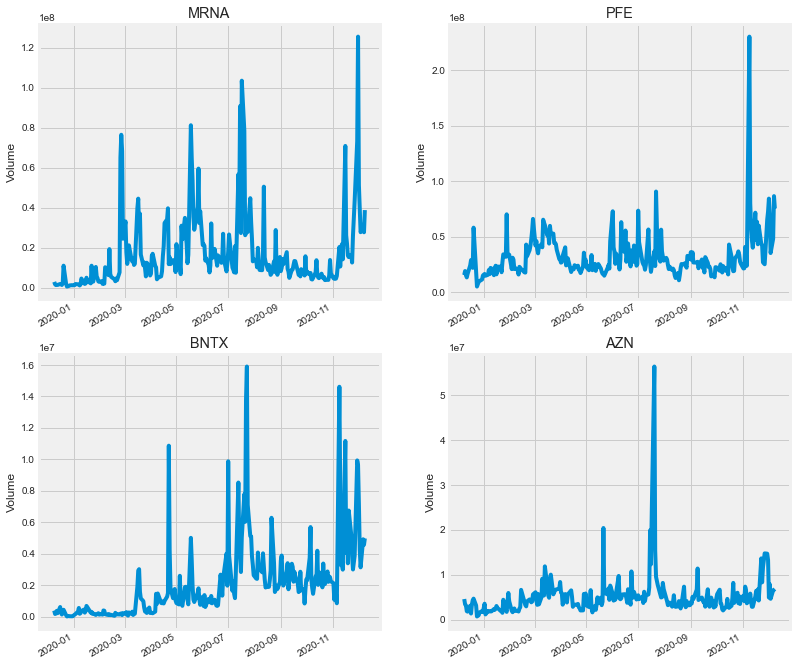

In [45]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"{tech_list[i - 1]}")

## Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

## What was the moving average of the various stocks

In [46]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()

In [47]:
print(PFE.columns)

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close', 'company_name',
       'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
      dtype='object')


## Now let's go ahead and plot all the additional Moving Averages

In [48]:
df.head()

,High,Low,Open,Close,Volume,Adj Close,company_name
Date,,,,,,,
2019-12-09,19.299999,18.670000,19.070000,18.780001,2814000.0,18.780001,MODERNA
2019-12-10,19.090000,18.580000,18.780001,18.870001,1619800.0,18.870001,MODERNA
2019-12-11,19.110001,18.530001,19.030001,18.650000,1233100.0,18.650000,MODERNA
2019-12-12,19.045000,18.320000,18.559999,18.450001,1313400.0,18.450001,MODERNA
2019-12-13,18.719999,18.320000,18.469999,18.620001,1302400.0,18.620001,MODERNA


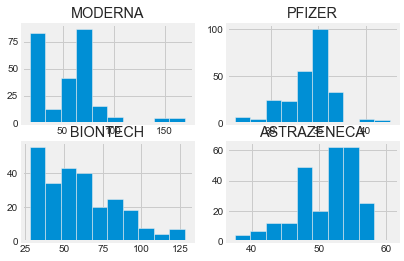

In [56]:
# Reduce to Adjusted Close only? not using any other prices
import math
columns=2
company_list= list(df['company_name'].unique())
fig, ax=plt.subplots(math.ceil(int(len(company_list)/columns)), columns)
for idx, each_company in enumerate(company_list):
    df[df['company_name']==each_company]['Adj Close'].hist(ax=ax[int(idx/columns)][idx%columns]);
    ax[int(idx/columns)][idx%columns].set_title(each_company)

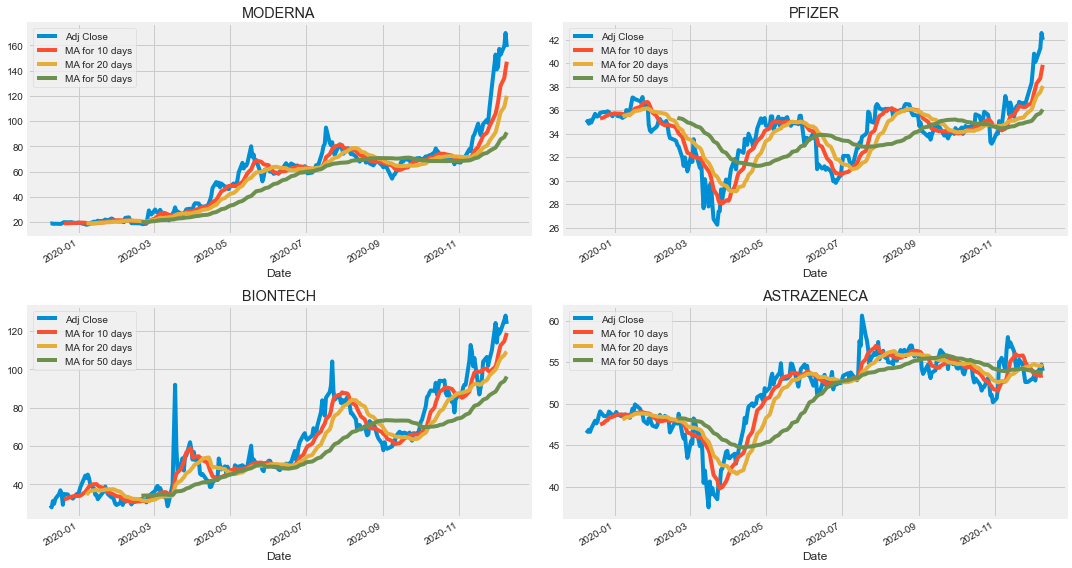

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

MRNA[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('MODERNA')

PFE[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('PFIZER')

BNTX[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('BIONTECH')

AZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('ASTRAZENECA')
fig.tight_layout()

## 3. What was the daily return of the stock on average?¶

## Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns.

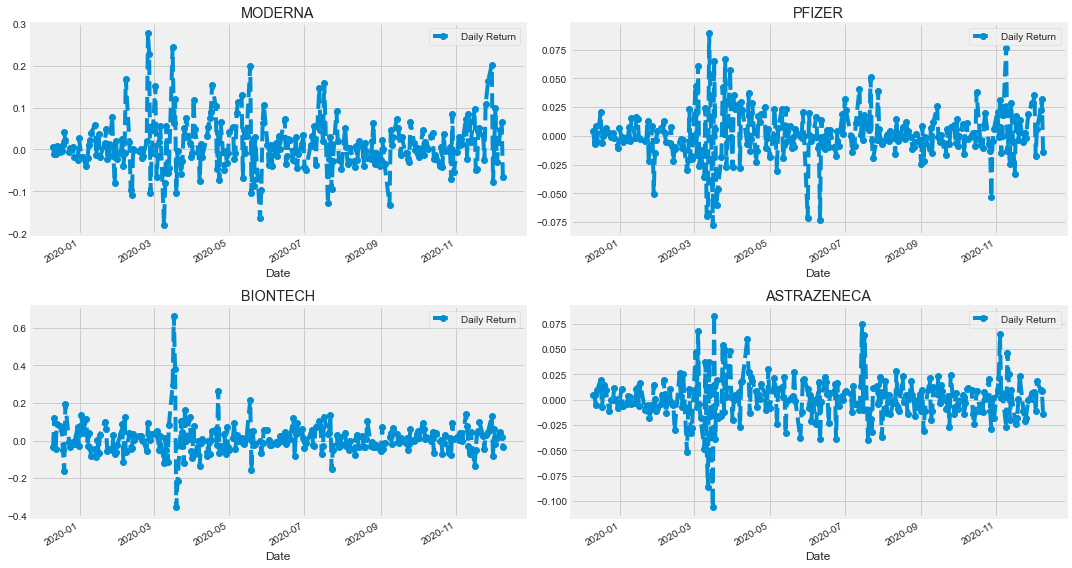

In [12]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

MRNA['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('MODERNA')

PFE['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('PFIZER')

BNTX['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('BIONTECH')
AZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('ASTRAZENECA')

fig.tight_layout()

## Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

C:\Users\peter\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\peter\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\peter\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

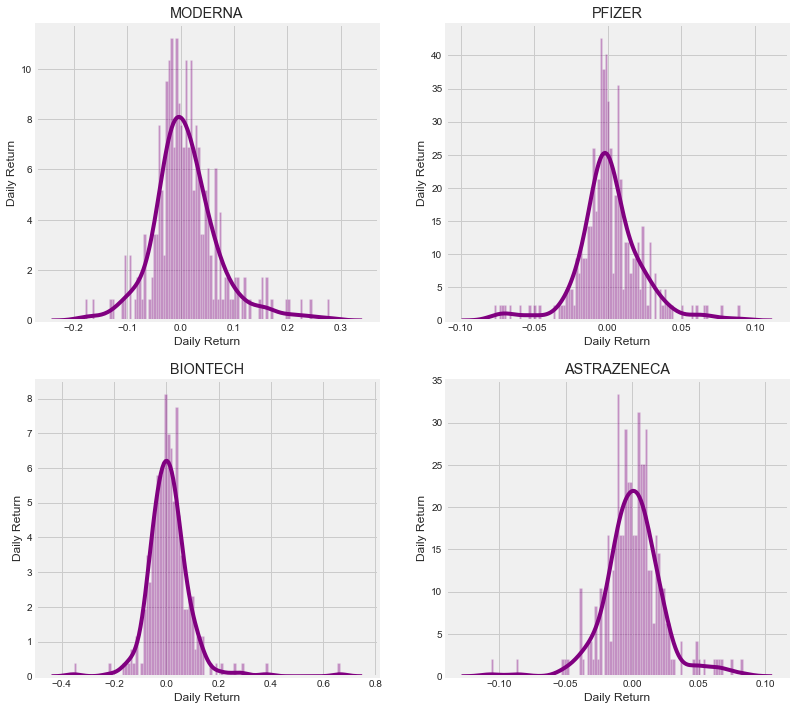

In [13]:
# Note the use of dropna() here, otherwise the NaN values can't be read by seaborn
plt.figure(figsize=(12, 12))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    sns.distplot(company['Daily Return'].dropna(), bins=100, color='purple')
    plt.ylabel('Daily Return')
    plt.title(f'{company_name[i - 1]}')
# Could have also done:
#['Daily Return'].hist()

## 4. What was the correlation between different stocks closing prices?

### Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

In [14]:
# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = DataReader(tech_list, 'yahoo', start, end)['Adj Close']

# Let's take a quick look
closing_df.head() 

Symbols,MRNA,PFE,BNTX,AZN
Date,,,,
2019-12-09,18.780001,34.929855,29.000000,46.444710
2019-12-10,18.870001,35.075703,28.000000,46.648884
2019-12-11,18.650000,34.838703,31.299999,46.853058
2019-12-12,18.450001,35.130390,29.840000,46.590546
2019-12-13,18.620001,34.938969,32.450001,47.018341


## Now that we have all the closing prices, let's go ahead and get the daily return for all the stocks, like we did for the MODERNA stock.

In [15]:
# Make a new tech returns DataFrame
vac_rets = closing_df.pct_change()
vac_rets.head()

Symbols,MRNA,PFE,BNTX,AZN
Date,,,,
2019-12-09,NaN,NaN,NaN,NaN
2019-12-10,0.004792,0.004175,-0.034483,0.004396
2019-12-11,-0.011659,-0.006757,0.117857,0.004377
2019-12-12,-0.010724,0.008372,-0.046645,-0.005603
2019-12-13,0.009214,-0.005449,0.087467,0.009182


## Now we can compare the daily percentage return of two stocks to check how correlated. First let's see a sotck compared to itself.

C:\Users\peter\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


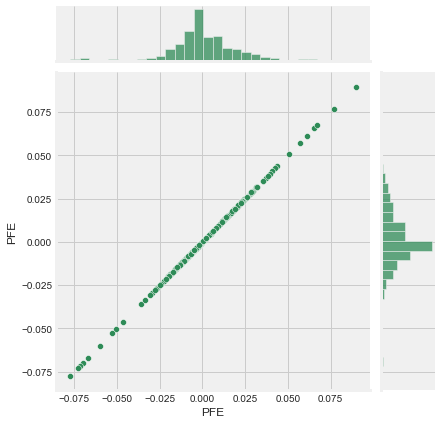

In [16]:
# Comparing Pfizer to itself should show a perfectly linear relationship
sns.jointplot('PFE', 'PFE', vac_rets, kind='scatter', color='seagreen')

C:\Users\peter\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


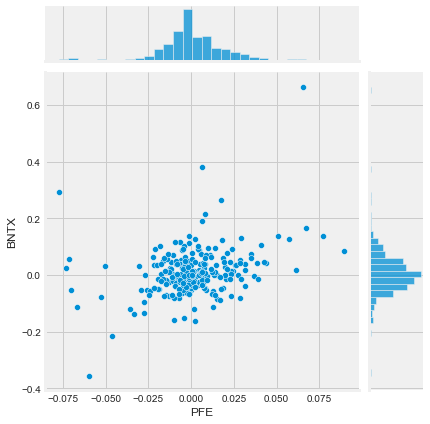

In [17]:
# We'll use joinplot to compare the daily returns of Pfizer and Biontech
sns.jointplot('PFE', 'BNTX', vac_rets, kind='scatter')

### So now we can see that if two stocks are perfectly (and positivley) correlated with each other a linear relationship bewteen its daily return values should occur.

### Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of stocks in our vaccine stock ticker list. We can use sns.pairplot() to automatically create this plot

C:\Users\peter\Anaconda3\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


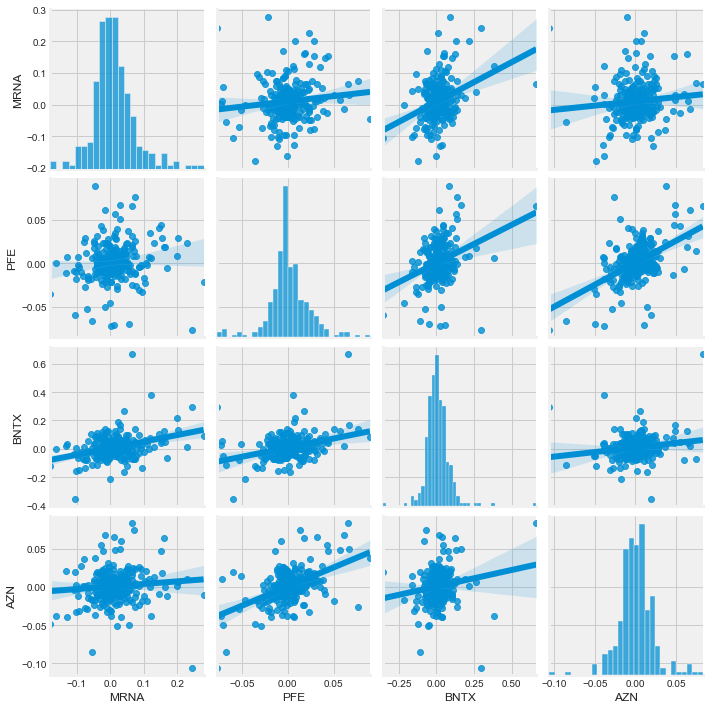

In [18]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(vac_rets, kind='reg')

### Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Pfizer and Astrazeneca daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

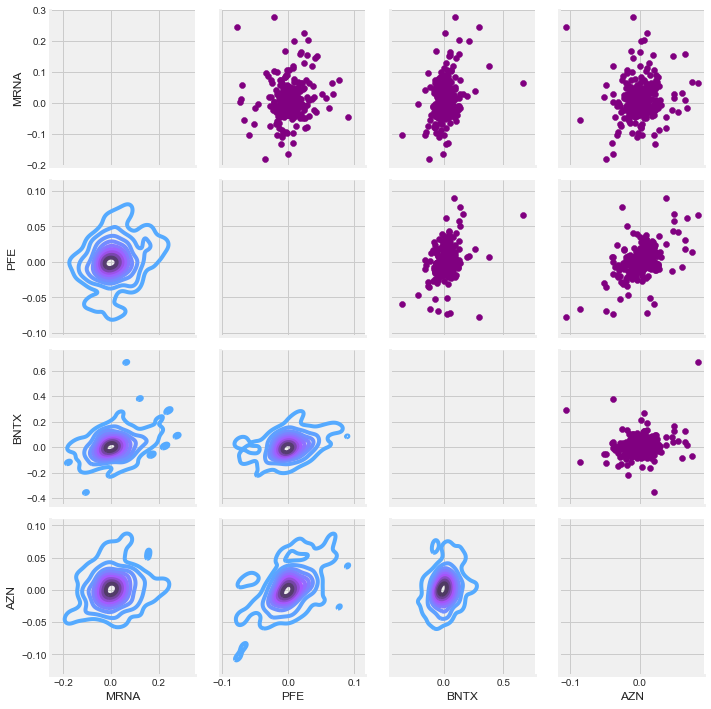

In [19]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(vac_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

In [57]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

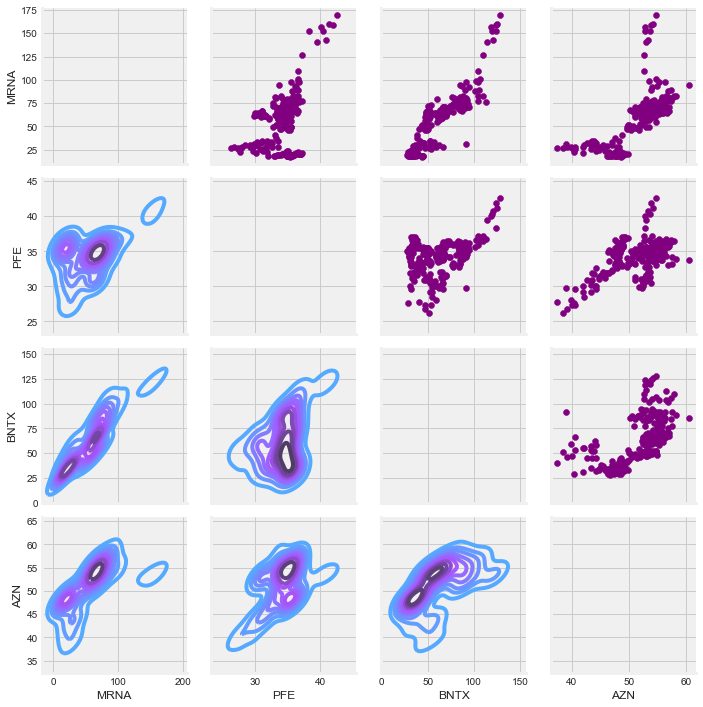

In [57]:
# Provide explanation for graphs and reason for selection

### Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Pfizer and Moderna.

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

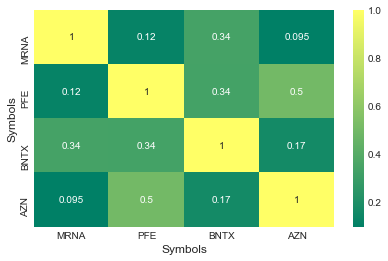

In [58]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(vac_rets.corr(), annot=True, cmap='summer')

In [62]:
closing_df.head()

Symbols,MRNA,PFE,BNTX,AZN
Date,,,,
2019-12-09,18.780001,34.929855,29.000000,46.444710
2019-12-10,18.870001,35.075703,28.000000,46.648884
2019-12-11,18.650000,34.838703,31.299999,46.853058
2019-12-12,18.450001,35.130390,29.840000,46.590546
2019-12-13,18.620001,34.938969,32.450001,47.018341


In [61]:
vac_rets.head()

Symbols,MRNA,PFE,BNTX,AZN
Date,,,,
2019-12-09,NaN,NaN,NaN,NaN
2019-12-10,0.004792,0.004175,-0.034483,0.004396
2019-12-11,-0.011659,-0.006757,0.117857,0.004377
2019-12-12,-0.010724,0.008372,-0.046645,-0.005603
2019-12-13,0.009214,-0.005449,0.087467,0.009182


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

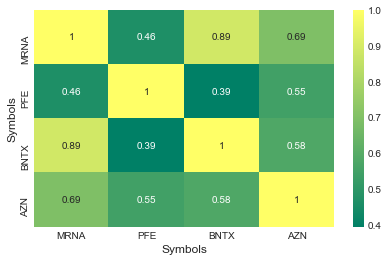

In [59]:
# movement direction remains consistent, but magnitude is changed when comparing Daily returns vs Adj Close
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

### Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Pfizer and Astrazeneca had the strongest correlation of daily stock return. It's also interesting to see that all the vaccine comapnies are positively correlated.

### 5. How much value do we put at risk by investing in a particular stock?

### There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

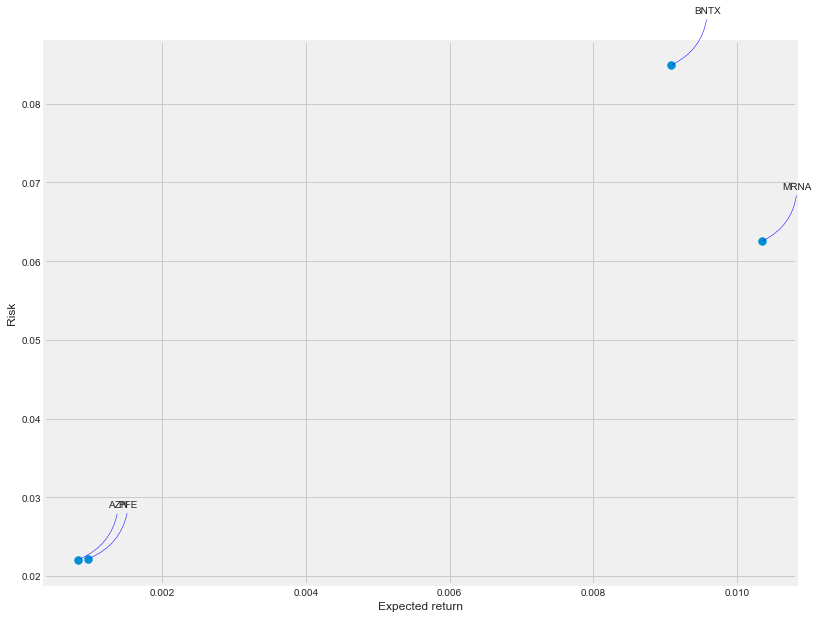

In [23]:
# Risk measured in Std (ALWAYS off retruns and NOT price), sometimes big swings can cause big problems, margin calls, emotional reactions and damage the account value

# Let's start by defining a new DataFrame as a clenaed version of the original tech_rets DataFrame
rets = vac_rets.dropna()

area = np.pi*20

plt.figure(figsize=(12, 10))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

### 6. Predicting the closing price stock price of MODERNA inc

In [64]:
#Get the stock quote
# df = DataReader('MRNA', data_source='yahoo', start='2012-01-01', end=datetime.now())
# #Show teh data
# df.head()
MRNA.head()

,High,Low,Open,Close,Volume,Adj Close,company_name,MA for 10 days,MA for 20 days,MA for 50 days
Date,,,,,,,,,,
2019-12-09,19.299999,18.670000,19.070000,18.780001,2814000,18.780001,MODERNA,NaN,NaN,NaN
2019-12-10,19.090000,18.580000,18.780001,18.870001,1619800,18.870001,MODERNA,NaN,NaN,NaN
2019-12-11,19.110001,18.530001,19.030001,18.650000,1233100,18.650000,MODERNA,NaN,NaN,NaN
2019-12-12,19.045000,18.320000,18.559999,18.450001,1313400,18.450001,MODERNA,NaN,NaN,NaN
2019-12-13,18.719999,18.320000,18.469999,18.620001,1302400,18.620001,MODERNA,NaN,NaN,NaN


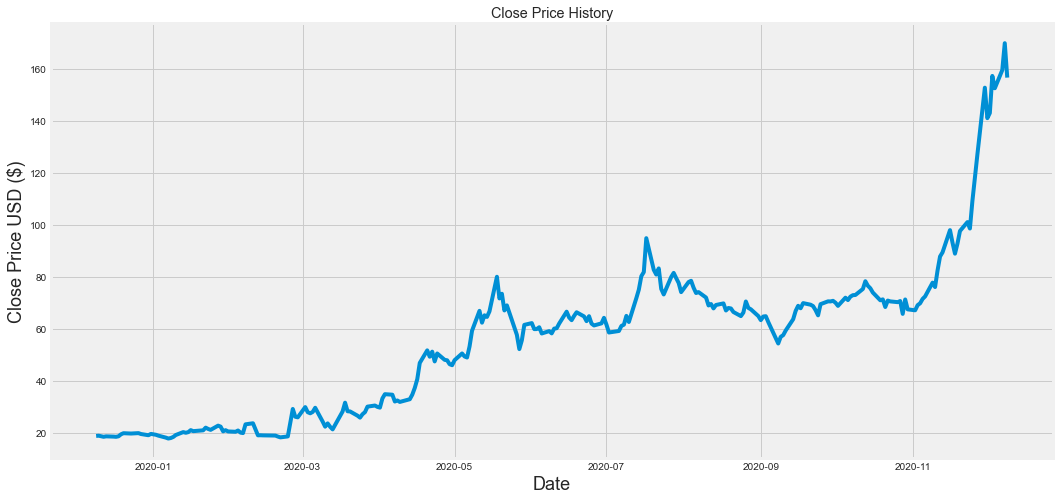

In [65]:

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(MRNA['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [66]:
#Create a new dataframe with only the 'Close column
data = MRNA.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .8 ))

training_data_len

204

In [27]:
#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[4.02284273e-02],
       [4.14974555e-02],
       [3.64847715e-02],
       [4.07360410e-02],
       [4.12436547e-02],
       [3.84517732e-02],
       [3.00761406e-02],
       [3.00761406e-02],
       [2.48730969e-02],
       [2.05583741e-02],
       [1.40228428e-02],
       [1.12309613e-02],
       [7.99492529e-03],
       [1.51649707e-02],
       [1.19923819e-02],
       [1.90989862e-02],
       [1.94796934e-02],
       [2.05583741e-02],
       [2.98223277e-02],
       [2.54441638e-02],
       [2.97588866e-02],
       [2.58248711e-02],
       [2.67766453e-02],
       [3.00761406e-02],
       [2.84263930e-02],
       [2.74746187e-02],
       [2.53807106e-02],
       [2.56979646e-02],
       [2.81091389e-02],
       [2.09390875e-02],
       [1.60532978e-02],
       [1.51015235e-02],
       [1.68147184e-02],
       [1.38959364e-02],
       [1.50380703e-02],
       [1.82106591e-02],
       [2.75380720e-02],
       [2.51268977e-02],
       [2.54441638e-02],
       [3.12182745e-02],


In [67]:
training_data_len

204

In [28]:
# Utilizing lags to inform the model to predict future prices
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.04022843, 0.04149746, 0.03648477, 0.04073604, 0.04124365,
       0.03845177, 0.03007614, 0.03007614, 0.0248731 , 0.02055837,
       0.01402284, 0.01123096, 0.00799493, 0.01516497, 0.01199238,
       0.01909899, 0.01947969, 0.02055837, 0.02982233, 0.02544416,
       0.02975889, 0.02582487, 0.02677665, 0.03007614, 0.02842639,
       0.02747462, 0.02538071, 0.02569796, 0.02810914, 0.02093909,
       0.0160533 , 0.01510152, 0.01681472, 0.01389594, 0.01503807,
       0.01821066, 0.02753807, 0.0251269 , 0.02544416, 0.03121827,
       0.03730964, 0.03039339, 0.03635787, 0.0375    , 0.04079949,
       0.03978427, 0.04695431, 0.05824873, 0.05437817, 0.04860406,
       0.04492386, 0.04835025, 0.05958121, 0.07258884, 0.06243655,
       0.06560914, 0.06351523, 0.05621828, 0.05780457, 0.05323604])]
[0.05285532933720398]

[array([0.04022843, 0.04149746, 0.03648477, 0.04073604, 0.04124365,
       0.03845177, 0.03007614, 0.03007614, 0.0248731 , 0.02055837,
       0.01402284, 0.01123096, 0.00

In [76]:
x_train[30]

array([[0.0160533 ],
       [0.01510152],
       [0.01681472],
       [0.01389594],
       [0.01503807],
       [0.01821066],
       [0.02753807],
       [0.0251269 ],
       [0.02544416],
       [0.03121827],
       [0.03730964],
       [0.03039339],
       [0.03635787],
       [0.0375    ],
       [0.04079949],
       [0.03978427],
       [0.04695431],
       [0.05824873],
       [0.05437817],
       [0.04860406],
       [0.04492386],
       [0.04835025],
       [0.05958121],
       [0.07258884],
       [0.06243655],
       [0.06560914],
       [0.06351523],
       [0.05621828],
       [0.05780457],
       [0.05323604],
       [0.05285533],
       [0.05501269],
       [0.0518401 ],
       [0.04441624],
       [0.04892131],
       [0.05431472],
       [0.06065989],
       [0.06294416],
       [0.05133249],
       [0.04911167],
       [0.04492386],
       [0.0427665 ],
       [0.04530456],
       [0.04847715],
       [0.0444797 ],
       [0.04695431],
       [0.05133249],
       [0.052

In [29]:
from tensorflow.python.keras.layers import LSTM, Dense
from tensorflow.python.keras.models import Sequential

#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

345/345 [==============================] - 13s 37ms/step - loss: 0.0020


In [30]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

17.80020156013558

<ipython-input-31-c4aee32f125a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


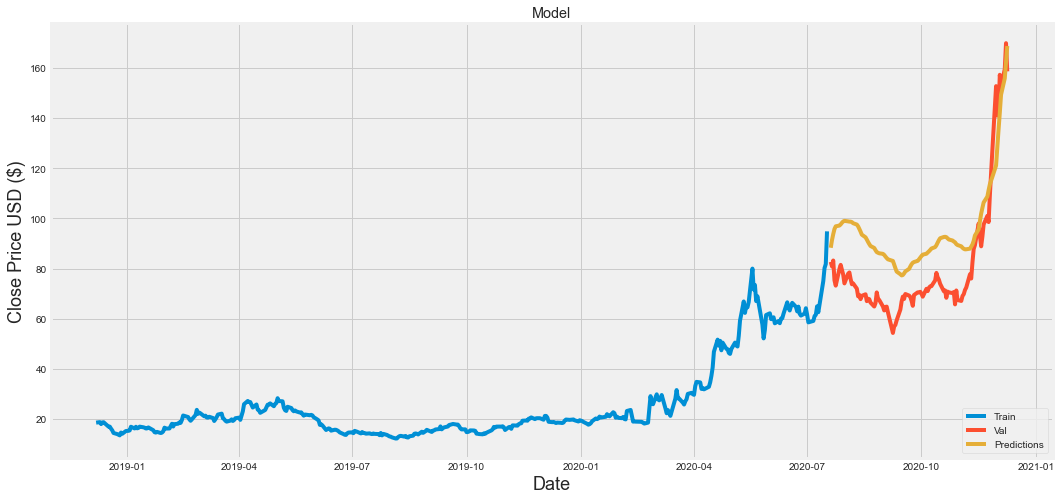

In [31]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [32]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-07-20,82.680000,88.304855
2020-07-21,80.860001,91.371674
2020-07-22,83.224998,93.735474
2020-07-23,75.330002,95.788269
2020-07-24,73.209999,96.855736
...,...,...
2020-12-03,157.259995,142.108109
2020-12-04,152.520004,149.316269
2020-12-07,159.520004,155.854477
